# Resultados de teste do robot Caixote, desde o início do ano

Conecta com MetaTrader

In [133]:
#####################################
# Init: imports and connects to MT5 #
#####################################
%matplotlib inline
#%matplotlib notebook
# imports
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import MetaTrader5 as mt5

#plt.ion()

# configs
pd.set_option('display.max_columns', 500) # number of columns to be displayed
pd.set_option('display.width', 1500)      # max table width to display
# display data on the MetaTrader 5 package
print("MetaTrader5 package author: " ,mt5.__author__)
print("MetaTrader5 package version: ",mt5.__version__)
print()
# establish connection to the MetaTrader 5 terminal
if not mt5.initialize():
    print("initialize() failed, error code =",mt5.last_error())
    quit()
print("Sucessfully connected")

MetaTrader5 package author:  MetaQuotes Software Corp.
MetaTrader5 package version:  5.0.34

Sucessfully connected


## Busca os dados de negociações

Define as datas de inicio e fim da busca.

Realiza consulta de negociações e retorna o número de negócios no período ou mensagem de erro se não achar nada

In [150]:
# get deals from/to dates and show number of deals
from_date = datetime(2020, 1, 1) 
to_date = datetime.now()
#to_date = datetime(2021, 5, 5) 
deals = mt5.history_deals_get(from_date, to_date)
# deals # <-- uncomment to show raw deals
# get the number of deals in history since start of year
if deals == None:
    print("No deals, error code={}".format(mt5.last_error()))
    quit()
elif len(deals) > 0:
    print("There was", len(deals), "deals from",  from_date, "to" ,to_date)

There was 5839 deals from 2020-01-01 00:00:00 to 2021-05-24 20:23:47.023931


Exibe os dados de negociações consultadas

In [151]:
# list deals one by own
print("Deals one by one: ", len(deals))
#for deal in deals:
#    print(" ",deal) # display all obtained deals 'as is'

Deals one by one:  5839


Cria o Data Frame

In [152]:
# create dataFrame from deals and add some columns
print("create dataFrame from Deals: ", len(deals))
# display these deals as a table using pandas.DataFrame
df = pd.DataFrame(list(deals), columns = deals[0]._asdict().keys())
# columns names
#deals[0]._asdict().keys()

create dataFrame from Deals:  5839


Prepara os dados

In [153]:
# customize data 
# insert readable datetime column 
df['time'] = pd.to_datetime(df['time'], unit = 's') 
# Show df examples 
#print(df) 
#print(df.head()) 
#print(df.tail()) 

**Normalizar valores**

Se for ação, reduz volume a um lote (100 unidades) e ajusta o valor

Se for indice, reduz volume a uma unidade e ajusta o valor


In [154]:
import numpy as np
#df['tipoAtivo'] = np.where(df["symbol"].str.slice(0, 3) == "WIN", 'WIN', 'AÇÃO')

df['newProfit'] = np.where(df["symbol"].str.slice(0, 3) == "WIN", 
                           df["profit"] / df["volume"], 
                           df["profit"] / (df["volume"] /100) )


Remove colunas não utilizadas

In [164]:
# remove unused columns
# df.drop(["external_id", "magic", "swap", "commission", "fee", "price", "ticket", "order", "time_msc", "type", "entry", "position_id", "reason", "comment"], inplace=True, axis=1)
# DEBUG: mostra resultado #df.head(20)

Agrupa e acumula os resultados por ativo 

In [165]:
# accumulate results by asset
df["amount"] = df.groupby(["symbol"]).newProfit.cumsum() # acumula profit agrupado por símbolo

Debug: Exibe uma amostra dos dados tratados e acumulados para conferência

In [166]:
# DEBUG: mostra resultado # df.head(20)

Agrupa os dados por Ativo e mostra o número de negócios por ativo

In [167]:
# plot linechart showing results by symbol by day
dfg = df.groupby("symbol")
dfg.count().profit

symbol
BBAS3      358
BBDC3      392
CSNA3      396
ITSA4      548
ITUB3      290
PETR4     1208
USIM5     1056
VALE3      758
VVAR3      308
WINJ21     343
WINM21     182
Name: profit, dtype: int64

Plota os dados

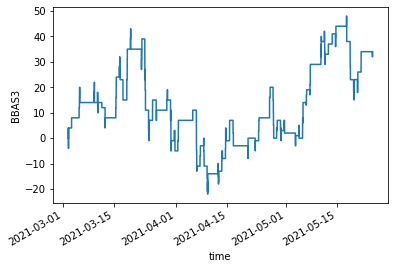

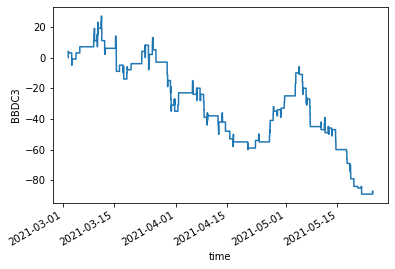

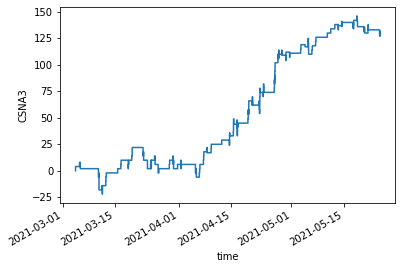

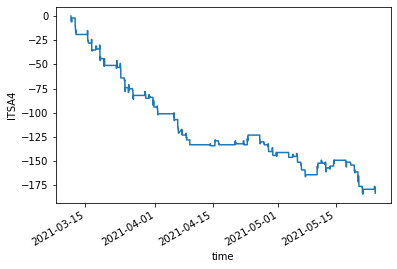

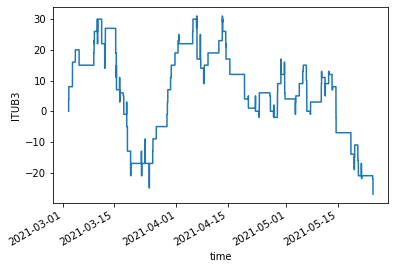

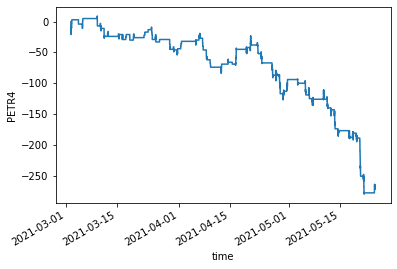

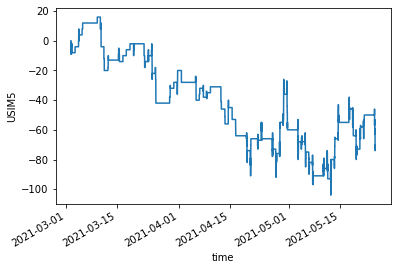

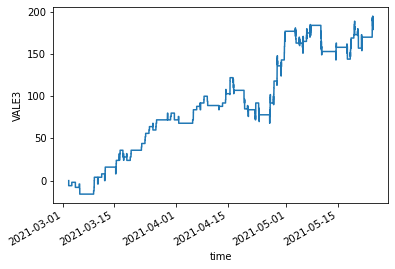

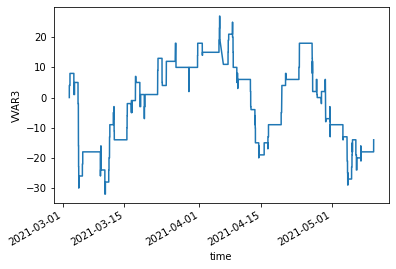

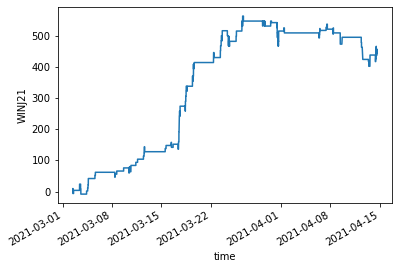

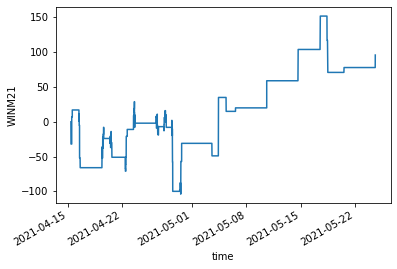

In [168]:
# iterage com cada item do grupo para personalizar o ylabel
for name, group in dfg:    
    group.plot(x='time', y='amount',ylabel=name, legend=False)

plt.show()

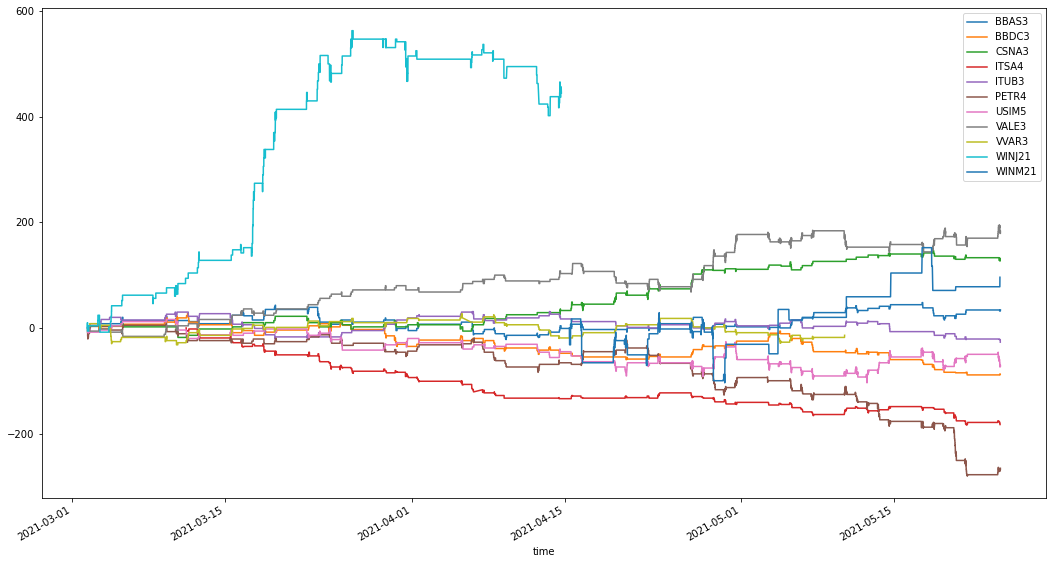

In [169]:
# iterage com o grupo para exibir todas as curvas no mesmo gráfico
fig, ax = plt.subplots(figsize=(18,10))
for name, group in dfg:    
    group.plot(x='time', y='amount', ax=ax, label=name)
plt.show()